
#### Realizado por: Mateo Jiménez Santacruz
La ecuación de Klein Gordon, para una partícula de masa m y de caga q, la cual esta sujeta a un potencial $U(\vec{r})$, está descrita por,

$$
\left(\hat{p}c^2+m^2c^4+U(\vec{r})^2\right)\Psi=\hat{E}^2\Psi
$$

En donde, $\hat{p} \rightarrow -i\hbar\nabla$ y $\hat{E} \rightarrow i\hbar \frac{\partial }{\partial t}$. LLevando estos operadores a la ecuación de Klein Gordon en una dimension espacial y una temporal, obtenemos que,

$$
\left(-\hbar^{2}c^2 \frac{\partial^2 }{\partial x^2} +  m^2c^4+U(\vec{r})^2\right)\Psi = -\hbar^2 \frac{\partial^2 }{\partial t^2} \Psi
$$

En este caso, vemos que el hamiltoniano no es dependiente del tiempo, por lo que podremos solucionar la ecución mediante una separación de variables, porponiendo,

$$
\Psi(x,t) = \phi(x)\gamma(t)
$$

Por lo que, despues de ingresar a la ecuación de Klein Gordon, y dividir por $\Psi$, llegamos a que,

$$
\frac{-\hbar^2c^2}{\phi(x)} \frac{\partial^2 \phi(x) }{\partial x^2} + m^2c^4+U(\vec{r})^2 = \frac{-\hbar^2}{\gamma(t)} \frac{\partial^2 \gamma(t) }{\partial t^2}
$$

Como cada lado de la ecuación depende de variables independientes entre si, podemos igualar la ecuación a la constante $E$,

$$
\frac{-\hbar^2c^2}{\phi(x)} \frac{\partial^2 \phi(x) }{\partial x^2} + m^2c^4+U(\vec{r})^2 = \frac{-\hbar^2}{\gamma(t)} \frac{\partial^2 \gamma(t) }{\partial t^2} = E
$$

Aislando la parte temporal, tendríamos que,
$$
-\hbar^2 \frac{\partial^2 \gamma(t) }{\partial t^2} + E\gamma(t)=0
$$

Obteniendo una solución de la forma,

$$
\gamma(t)= e^{-iwt}
$$

Obteniendo asi que,
$$
\Psi(x,t) = e^{-iwt}\phi(x)
$$
Por lo que la parte temporal solo supondría una fase en nuestra solución, debido a esto, el desarrollo computacional de este documento solo se basará en lo relacionado a encontrar la solución, los autoestados y las autoenergías pertenecientes a la parte espacial. Además, se aportan condiciones de Neumman en el enunciado del problema, las cuales son,

$$
\frac{\partial \Psi(0,t)}{\partial t} = \frac{\partial \Psi(L,t)}{\partial t} = 0
$$

Estas condiciones pueden ser reducidas a condiciones de Dirichlet, al la parte temporal de la función representar una fase, por lo que las condiciones para la parte espacial quedan descritas por,

$$
\phi(0)=\phi(L)=0
$$

Las autoenergías para la partícula con U0=0, son: array([0.24801113, 0.99203479, 2.23204186, 3.96798377, 6.19979253,
       8.92738072])


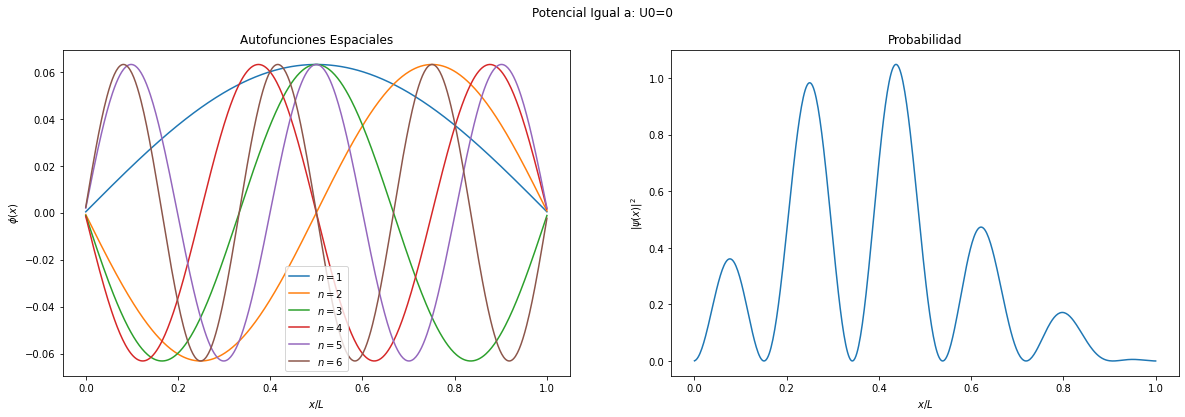

Las autoenergías para la partícula con U0=mc^2/5, son: array([0.24801113, 0.99203479, 2.23204186, 3.96798377, 6.19979253,
       8.92738072])


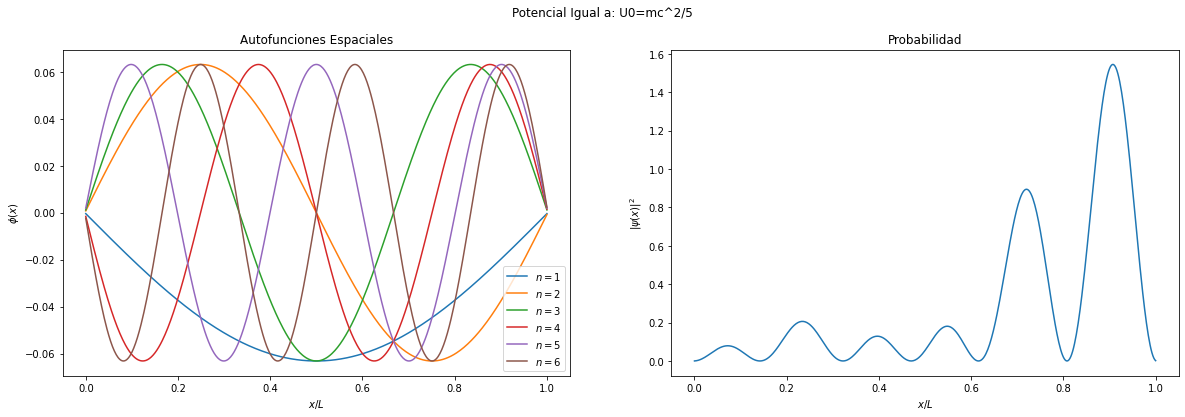

Las autoenergías para la partícula con U0=mc^2, son: array([0.24801113, 0.99203479, 2.23204186, 3.96798377, 6.19979253,
       8.92738072])


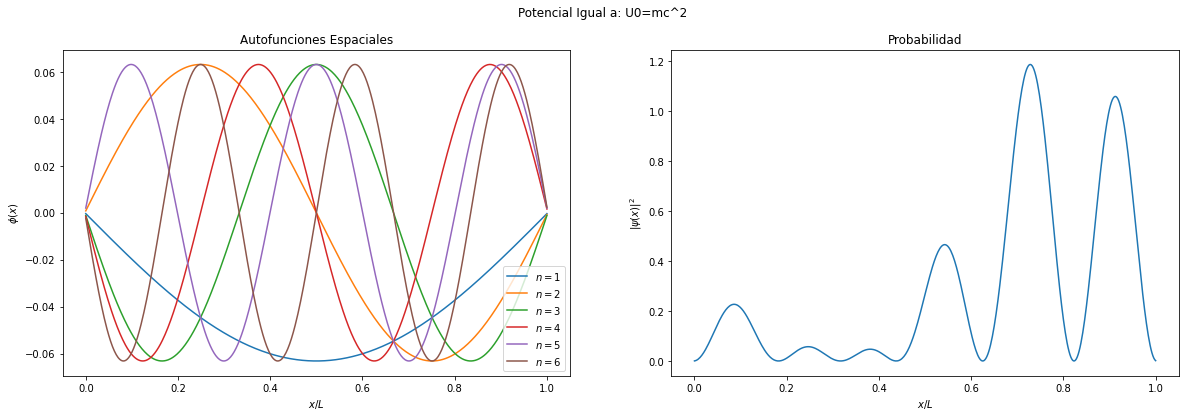

Las autoenergías para la partícula con U0=10^3*mc^2, son: array([0.24801113, 0.99203479, 2.23204186, 3.96798377, 6.19979253,
       8.92738072])


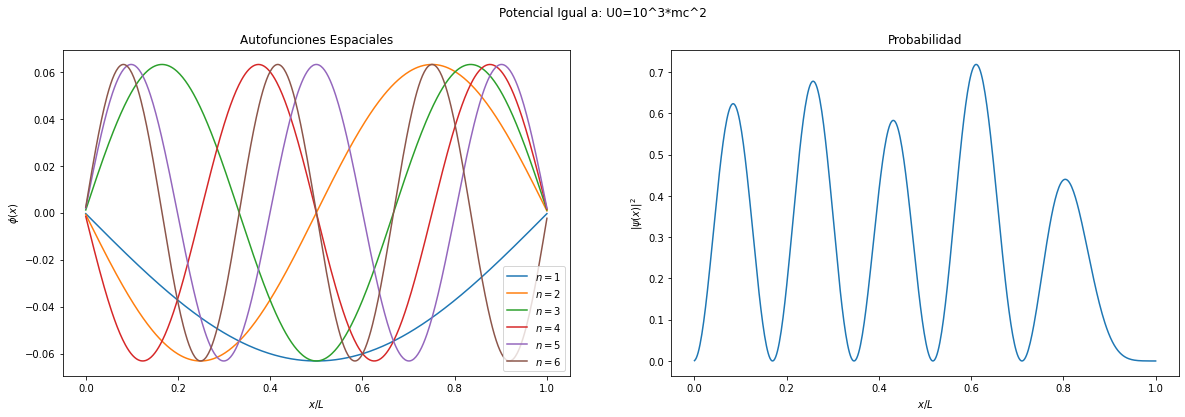

In [115]:
from __future__ import division, print_function
import numpy as np
from scipy.sparse import diags
from scipy.sparse.linalg import eigsh
import matplotlib.pyplot as plt
from numpy.linalg import eig

#Constantes

L = 2*np.pi
N = 501
x = np.linspace(0, L, N)
dx = x[1] - x[0]
hbar=1
c=1
#hbar=1.05457182e-34
#c=3e8
m=9.11e-31
u0={'U0=0':0,'U0=mc^2/5':(m*c**2)/5,'U0=mc^2':m*c**2,'U0=10^3*mc^2':10**3*m*c**2}

#Construccion de la matriz del hamiltoniano

T = -c**2*(hbar)**2*diags([-2., 1., 1.], [0,-1, 1], shape=(N, N))/dx**2

for i in u0:
    U_vec = m**2*c**4+ u0[i]**2
    U = diags([U_vec], [0], shape=(N, N))
    H = T + U

    #Autovalores y Autovectores del operador H

    vals, vecs = eigsh(H,which="SM")
    
    print(f"Las autoenergías para la partícula con %s, son: %a" %(i, vals))

    for k in range(vecs.shape[1]):
        vec = vecs[:, k]
        mag = np.sqrt(np.dot(vecs[:, k],np.conjugate(vecs[:, k])))
        vec = vec/mag
        plt.subplot(1, 2, 1)
        plt.plot(x/L, vec, label=r"$n=%i$"%(k+1))
    
    plt.xlabel(r"$x/L$")
    plt.ylabel(r"$\phi(x)$")
    plt.title("Autofunciones Espaciales")
    plt.legend()

    
    psi=vals@vecs.T
    psi2=psi*np.conjugate(psi)
    plt.subplot(1, 2, 2)
    plt.plot(x/L,psi2)
    plt.xlabel(r"$x/L$")
    plt.ylabel(r"$|\psi(x)|^2$")
    plt.rcParams["figure.figsize"] = (20,6)
    plt.title("Probabilidad")
    plt.suptitle("Potencial Igual a: " +i)
    plt.show()
    del psi,H,vals,vecs


Analizando las gráficas anteriores, vemos que no tienen sentido físico, ya que se esperaba probabilidades negativas por lo comentado en clase. Además, la probabilidad en este caso da diferente cada vez que se corre el código, al obtener autovectores válidos pero no constantes al evaluar la función $eigsh(H,which='SM')$, donde 'SM' nos provee los autovectores de menor magnitud, pero, con la falla de que nos da $\lambda$ veces el autovector. En conclusión, el código anterior fue realizado como aproximación a la solución de la ecuacion de Klein Gordon en 1D+1, pero debe ser revisado y tal vez, rehecho desde otro método computacional al presentarse tantos inexactitudes.